In [42]:
# Import the required packages

import numpy as np
import pandas as pd
import seaborn as sns
import missingno

from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.


In [43]:
# Load the csv file and create a dataframe
data = pd.read_csv('automobile.txt', sep=",")

In [44]:
# View the first 10 rows of the dataframe
data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [45]:
# how many rows and columns do we have?
data.shape

(205, 26)

In [46]:
# I will not be using the following columns, so I'll drop them from the dataframe
data.drop(['normalized-losses', 'num-of-doors', 'engine-location', 'wheel-base', 'length', 'width', 'height',
           'fuel-system', 'num-of-cylinders', 'bore', 'stroke', 'compression-ratio', 'peak-rpm'], inplace=True, axis=1)

In [47]:
# I want to remove any duplicate rows
data.drop_duplicates(subset=None, keep='first', inplace=False)

,symboling,make,fuel-type,aspiration,body-style,drive-wheels,curb-weight,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,convertible,rwd,2548,dohc,130,111,21,27,13495
1,3,alfa-romero,gas,std,convertible,rwd,2548,dohc,130,111,21,27,16500
2,1,alfa-romero,gas,std,hatchback,rwd,2823,ohcv,152,154,19,26,16500
3,2,audi,gas,std,sedan,fwd,2337,ohc,109,102,24,30,13950
4,2,audi,gas,std,sedan,4wd,2824,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,sedan,rwd,2952,ohc,141,114,23,28,16845
201,-1,volvo,gas,turbo,sedan,rwd,3049,ohc,141,160,19,25,19045
202,-1,volvo,gas,std,sedan,rwd,3012,ohcv,173,134,18,23,21485
203,-1,volvo,diesel,turbo,sedan,rwd,3217,ohc,145,106,26,27,22470


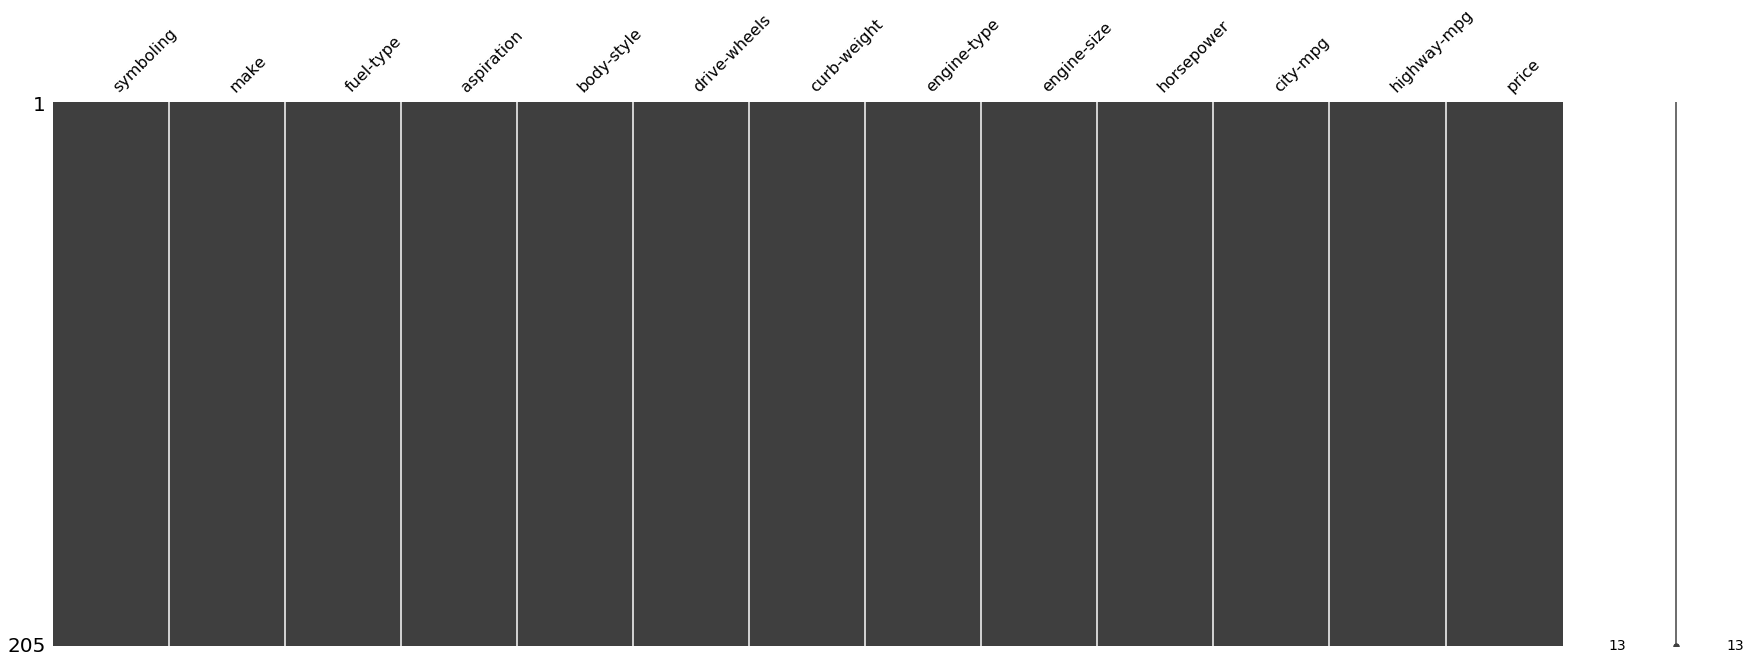

In [48]:
# I can plot a graphic of missing values
missingno.matrix(data, figsize = (30,10))

In [49]:
# We need to see how many missing values we have - I noticed the use of question marks to represent missing values
# I want to replace these with NaN first
data = data.replace('?', np.nan)
# Now I can get the number of missing data points per column
missing_values_count = data.isnull().sum()
# Look at the # of missing points in all columns
missing_values_count

symboling       0
make            0
fuel-type       0
aspiration      0
body-style      0
drive-wheels    0
curb-weight     0
engine-type     0
engine-size     0
horsepower      2
city-mpg        0
highway-mpg     0
price           4
dtype: int64

In [50]:
# Let's look at the data types and make sure they're correct
data.dtypes

symboling        int64
make            object
fuel-type       object
aspiration      object
body-style      object
drive-wheels    object
curb-weight      int64
engine-type     object
engine-size      int64
horsepower      object
city-mpg         int64
highway-mpg      int64
price           object
dtype: object

In [51]:
# Price and horsepower should be chaged from object type to float64 type
data[['price']]=data[['price']].astype('float64')
data[['horsepower']]=data[['horsepower']].astype('float64')

In [52]:
data.dtypes

symboling         int64
make             object
fuel-type        object
aspiration       object
body-style       object
drive-wheels     object
curb-weight       int64
engine-type      object
engine-size       int64
horsepower      float64
city-mpg          int64
highway-mpg       int64
price           float64
dtype: object

In [53]:
# We need to see how many missing values we have - I noticed the use of question marks to represent missing values
# I want to replace these with NaN first
data = data.replace('?', np.nan)
# Now I can get the number of missing data points per column
missing_values_count = data.isnull().sum()
# Look at the # of missing points in all columns
missing_values_count

symboling       0
make            0
fuel-type       0
aspiration      0
body-style      0
drive-wheels    0
curb-weight     0
engine-type     0
engine-size     0
horsepower      2
city-mpg        0
highway-mpg     0
price           4
dtype: int64

In [54]:
# Since we are going to be investigating the influence of different factors on the price of a car, 
# we need to drop the rows which do not have a price for a car.
data.dropna(subset=['price'], axis=0,inplace=True)
# I will use average values for horsepower and peak rpm
data.horsepower.fillna(value=data.horsepower.mean(), inplace=True)

In [55]:
# Now I want a summary of the data
data.describe()

,symboling,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,2555.666667,126.875622,103.396985,25.179104,30.686567,13207.129353
std,1.254802,517.296727,41.546834,37.365602,6.423220,6.815150,7947.066342
min,-2.000000,1488.000000,61.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,2169.000000,98.000000,70.000000,19.000000,25.000000,7775.000000
50%,1.000000,2414.000000,120.000000,95.000000,24.000000,30.000000,10295.000000
75%,2.000000,2926.000000,141.000000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,4066.000000,326.000000,262.000000,49.000000,54.000000,45400.000000


Text(0, 0.5, 'Number of cars')

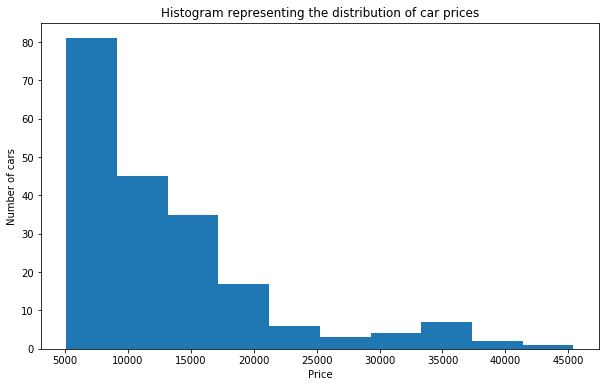

In [56]:
# Create a histogram representing the distribution of car prices
fig = plt.figure(figsize = (10,6)) # set the size of the figure
ax = fig.gca() # define the axis
data['price'].plot.hist(ax = ax) # plot a histogram on only the Price column
ax.set_title('Histogram representing the distribution of car prices') # give the histogram a title
ax.set_xlabel('Price') # Label the axes
ax.set_ylabel('Number of cars')

Text(0, 0.5, 'Number of cars')

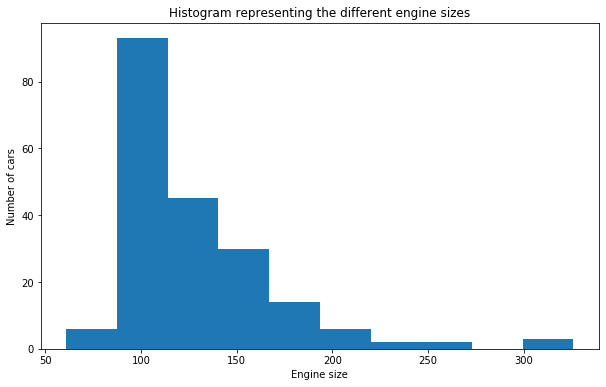

In [57]:
# Plot a histogram showing different engine sizes
fig = plt.figure(figsize = (10,6)) # set the size of the figure
ax = fig.gca() # define the axis
data['engine-size'].plot.hist(ax = ax) # plot a histogram on only the EngineSize column
ax.set_title('Histogram representing the different engine sizes') # give the histogram a title
ax.set_xlabel('Engine size') # Label the axes
ax.set_ylabel('Number of cars')

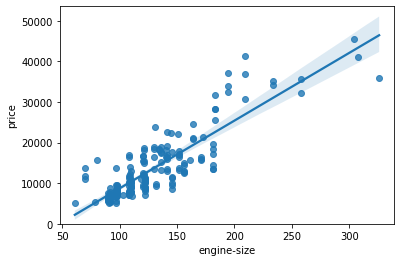

In [58]:
# What is the relationship between engine size and car price?
sns.regplot(x='engine-size', y='price', data=data)
plt.ylim(0,)
plt.show()

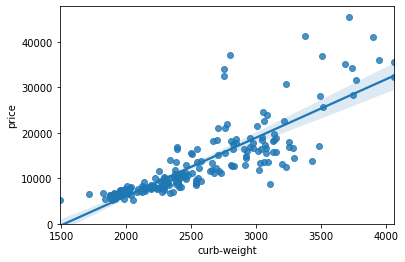

In [59]:
# What is the relationship between curb weight and car price?
sns.regplot(x='curb-weight', y='price', data=data)
plt.ylim(0,)
plt.show()

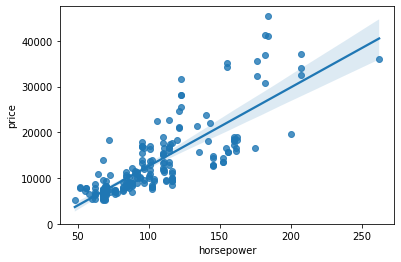

In [60]:
# What is the relationship between horsepower and car price?
sns.regplot(x='horsepower', y='price', data=data)
plt.ylim(0,)
plt.show()

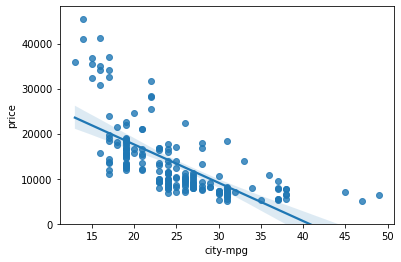

In [61]:
# What is the relationship between mileage and car price?
sns.regplot(x='city-mpg', y='price', data=data)
plt.ylim(0,)
plt.show()

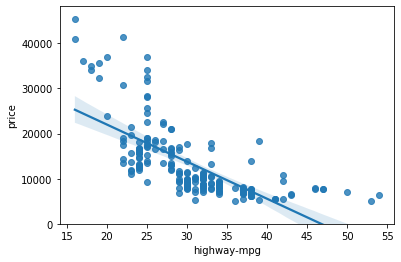

In [62]:
sns.regplot(x='highway-mpg', y='price', data=data)
plt.ylim(0,)
plt.show()

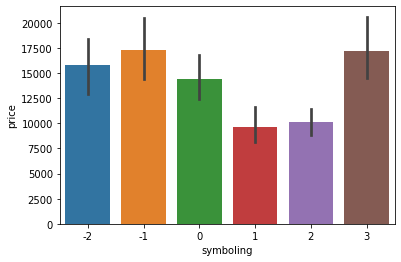

In [63]:
# How do prices differ between insurance risk levels?
sns.barplot(x='symboling', y='price', data=data)

<function matplotlib.pyplot.show(*args, **kw)>

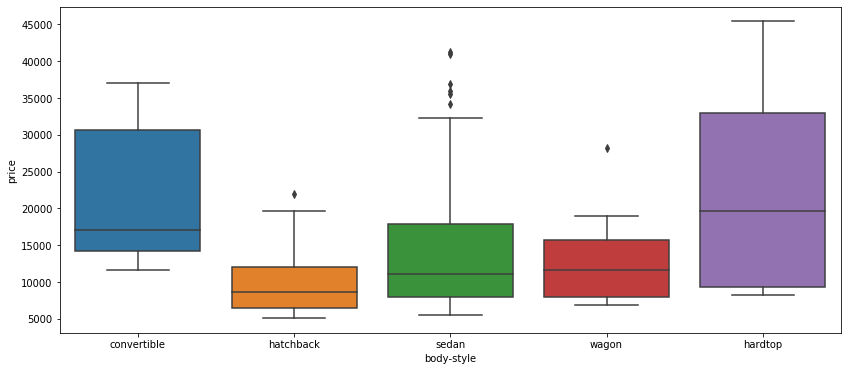

In [64]:
# Do different types of cars have different prices?
fig = plt.figure(figsize = (14,6)) # set the size of the figure
sns.boxplot(x='body-style',y='price',data=data)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

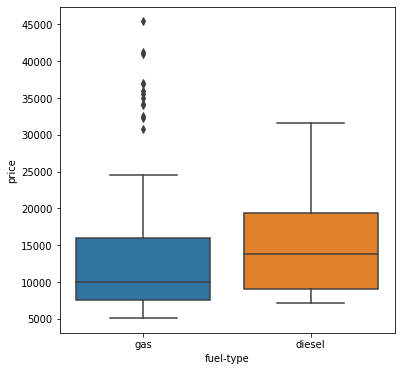

In [65]:
# Do cars with different fuel types have different prices?
plt.figure(figsize = (6,6)) # set the size of the figure
sns.boxplot(x='fuel-type',y='price',data=data)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

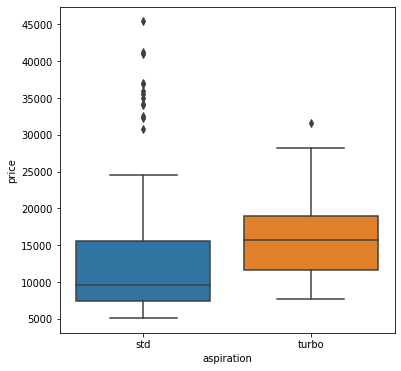

In [66]:
# Do different types of cars have different prices?
# set the size of the figure
plt.figure(figsize=(6,6))
sns.boxplot(x='aspiration',y='price',data=data)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

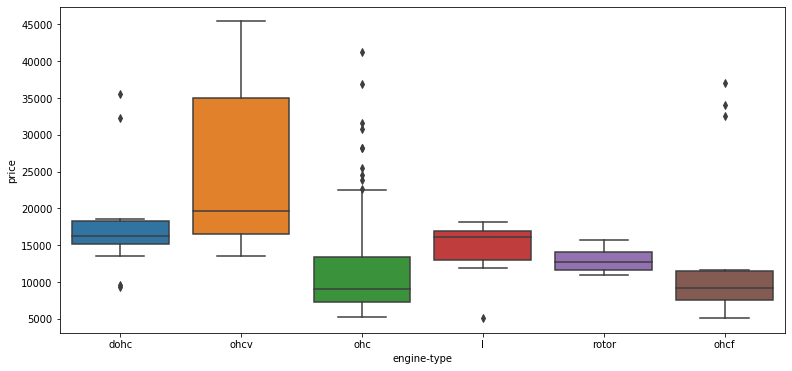

In [67]:
# Do different do cars with different types of engines have different prices?
plt.figure(figsize=(13,6))
sns.boxplot(x='engine-type',y='price',data=data)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

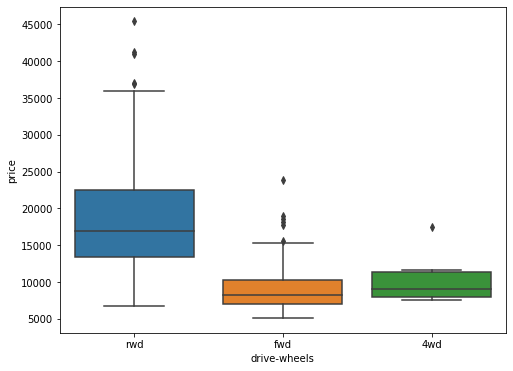

In [68]:
# Does the type of wheel drive have an influence on the price of a car?
plt.figure(figsize=(8,6))
sns.boxplot(x='drive-wheels',y='price',data=data)
plt.show

In [69]:
# Group cars by make
group_by_make = data.groupby(by=['make'])

data_avg = round(group_by_make.mean(),0)
data_avg

,symboling,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price
make,,,,,,,
alfa-romero,2.0,2640.0,137.0,125.0,20.0,27.0,15498.0
audi,2.0,2759.0,131.0,114.0,19.0,24.0,17859.0
bmw,0.0,2929.0,167.0,139.0,19.0,25.0,26119.0
chevrolet,1.0,1757.0,80.0,63.0,41.0,46.0,6007.0
dodge,1.0,2151.0,103.0,86.0,28.0,34.0,7875.0
honda,1.0,2097.0,99.0,80.0,30.0,35.0,8185.0
isuzu,1.0,2536.0,115.0,84.0,24.0,29.0,8916.0
jaguar,0.0,4027.0,281.0,205.0,14.0,18.0,34600.0
mazda,1.0,2298.0,103.0,86.0,26.0,32.0,10653.0


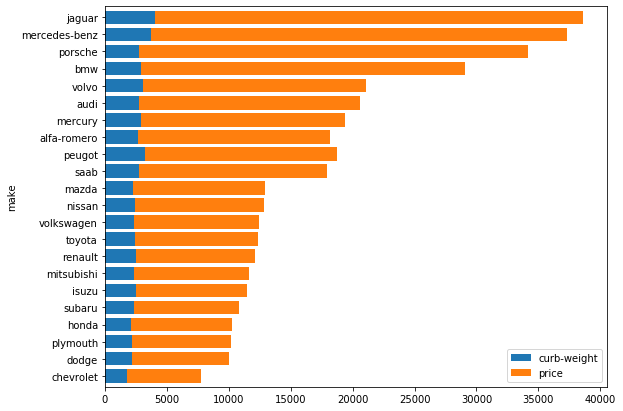

In [70]:
## we will assemble a DataFrame of only the relevant features to plot  
features = pd.DataFrame({'curb-weight': data_avg["curb-weight"], 'price': data_avg['price']})

## Let us plot the prices for all makes
features = features.iloc[:].sort_values('price')
features.plot.barh(stacked=True, width=0.8, figsize=(9,7))

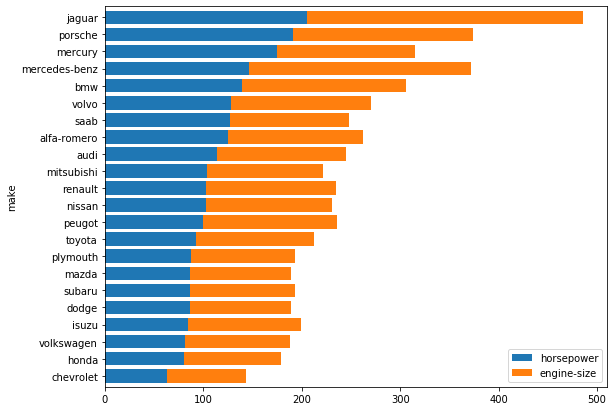

In [71]:
## we will assemble a DataFrame of only the relevant features to plot  
features = pd.DataFrame({'horsepower': data_avg['horsepower'], 'engine-size': data_avg['engine-size']})

## Let us plot a few of the manufactures for visibility
features = features.iloc[:].sort_values('horsepower')
features.plot.barh(stacked=True, width=0.8, figsize=(9,7))

In [72]:
# create a new column for the number of times each car occurs
data_avg['count'] = data['make'].value_counts()
# Assign a variable to store the sorted counts
count_sorted = data_avg.sort_values(by=['count'])

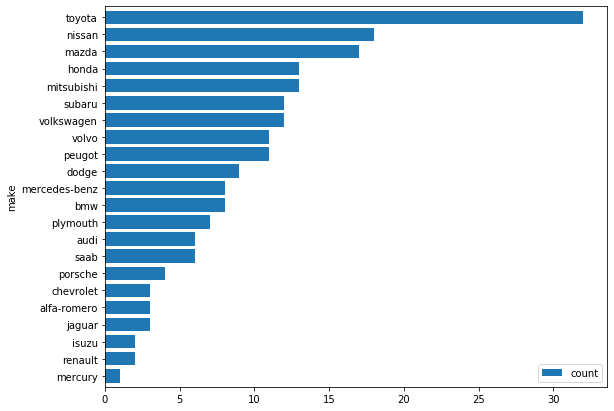

In [73]:
# Create a dataframe with the sorted counts
count = pd.DataFrame(count_sorted.iloc[:,7])
# Plot a bar graph showing how common the different cars are
count.plot.barh(width=0.8, figsize=(9,7))

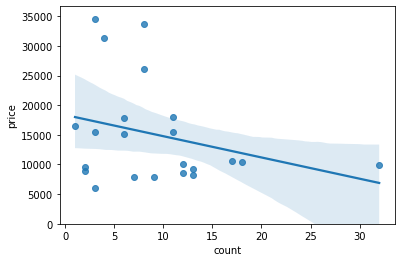

In [74]:
sns.regplot(x='count', y='price', data=data_avg)
plt.ylim(0,)
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026A35839948>],
      dtype=object)

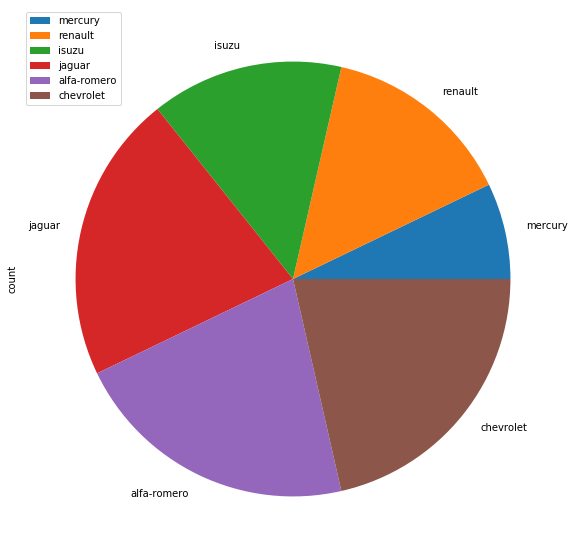

In [75]:
# Plot a pie chart of the 6 least common cars
count_df = pd.DataFrame({'count': data_avg['count']})
bottom6 = pd.DataFrame(count_sorted.iloc[:6,7])
bottom6.plot.pie(subplots=True, figsize=(10, 10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026A34D2B988>],
      dtype=object)

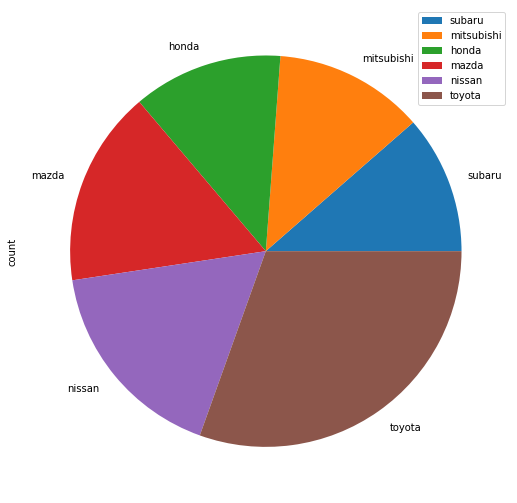

In [39]:
# Plot a pie chart of the 6 most common cars
top6 = pd.DataFrame(count_sorted.iloc[16:,7])
top6.plot.pie(subplots=True, figsize=(9, 9))